In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
import scipy.stats
import numpy as np

In [2]:
colunas = ['categoria_adm_IES', 'organizacao_academica', 'nome_curso', 'turno', 'regiao', 'uf',
       'idade', 'idade_comeco_graduacao', 'tempo_ocioso', 'tempo_cursado', 'recebeu_cota', 
       'ensino_medio', 'tipo_ensino_medio', 'escolaridade_pai', 'escolaridade_mae',
       'estado_civil', 'cor_raca', 'sexo', 'moradia', 'pessoas_moradia',
       'trabalha', 'renda_familiar', 'livros_ano', 'horas_estudo',
       'condicoes_salas_estudantes', 'condicoes_praticas_materiais',
       'plano_ensino', 'avaliacao_curso', 'nota_geral_normalizada']

In [3]:
enade_df = pd.read_csv('enade_merge_08-11-14-17.csv',sep=',',decimal='.', usecols=colunas)

In [4]:
binarias = ['categoria_adm_IES','recebeu_cota','sexo','trabalha']

In [5]:
label_encoder = LabelEncoder()

#transformando categoria de cada coluna em numeros
for i in binarias:
    enade_df[i] = label_encoder.fit_transform(enade_df[i])

In [6]:
new_df = pd.DataFrame()
colunas.remove('nota_geral_normalizada')
new_df = pd.get_dummies(data = enade_df, columns = list(set(colunas).difference(binarias)) )

In [7]:
new_df.to_csv('./{}.csv'.format('enade_regression'),index=False,float_format='%.2f')

In [8]:
features = new_df.loc[:, new_df.columns != 'nota_geral_normalizada']

X = features
y = new_df['nota_geral_normalizada'] #variavel alvo

In [9]:
# from sklearn.feature_selection import mutual_info_regression as mreg

# mi = mreg(X, y)

In [10]:
# scores = pd.Series(mi[0], index=X.columns)
# mutualdf = pd.DataFrame({'MI':scores})
# mutualdf = mutualdf.sort_values(by='MI', ascending = False)
# mutualdf.reset_index(level=0, inplace=True)
# mutualdf.rename(columns={'index':'feature'}, inplace=True)

In [11]:
# mutualdf.plot.bar(x='feature', y = 'MI', figsize=(50,50))

In [12]:
from sklearn.feature_selection import f_regression

fr = f_regression(X, y)

In [13]:
scores = pd.Series(fr[0], index=X.columns)
frdf = pd.DataFrame({'FR':scores})
frdf = frdf.sort_values(by='FR', ascending = False)
frdf.reset_index(level=0, inplace=True)
frdf.rename(columns={'index':'feature'}, inplace=True)

<AxesSubplot:xlabel='feature'>

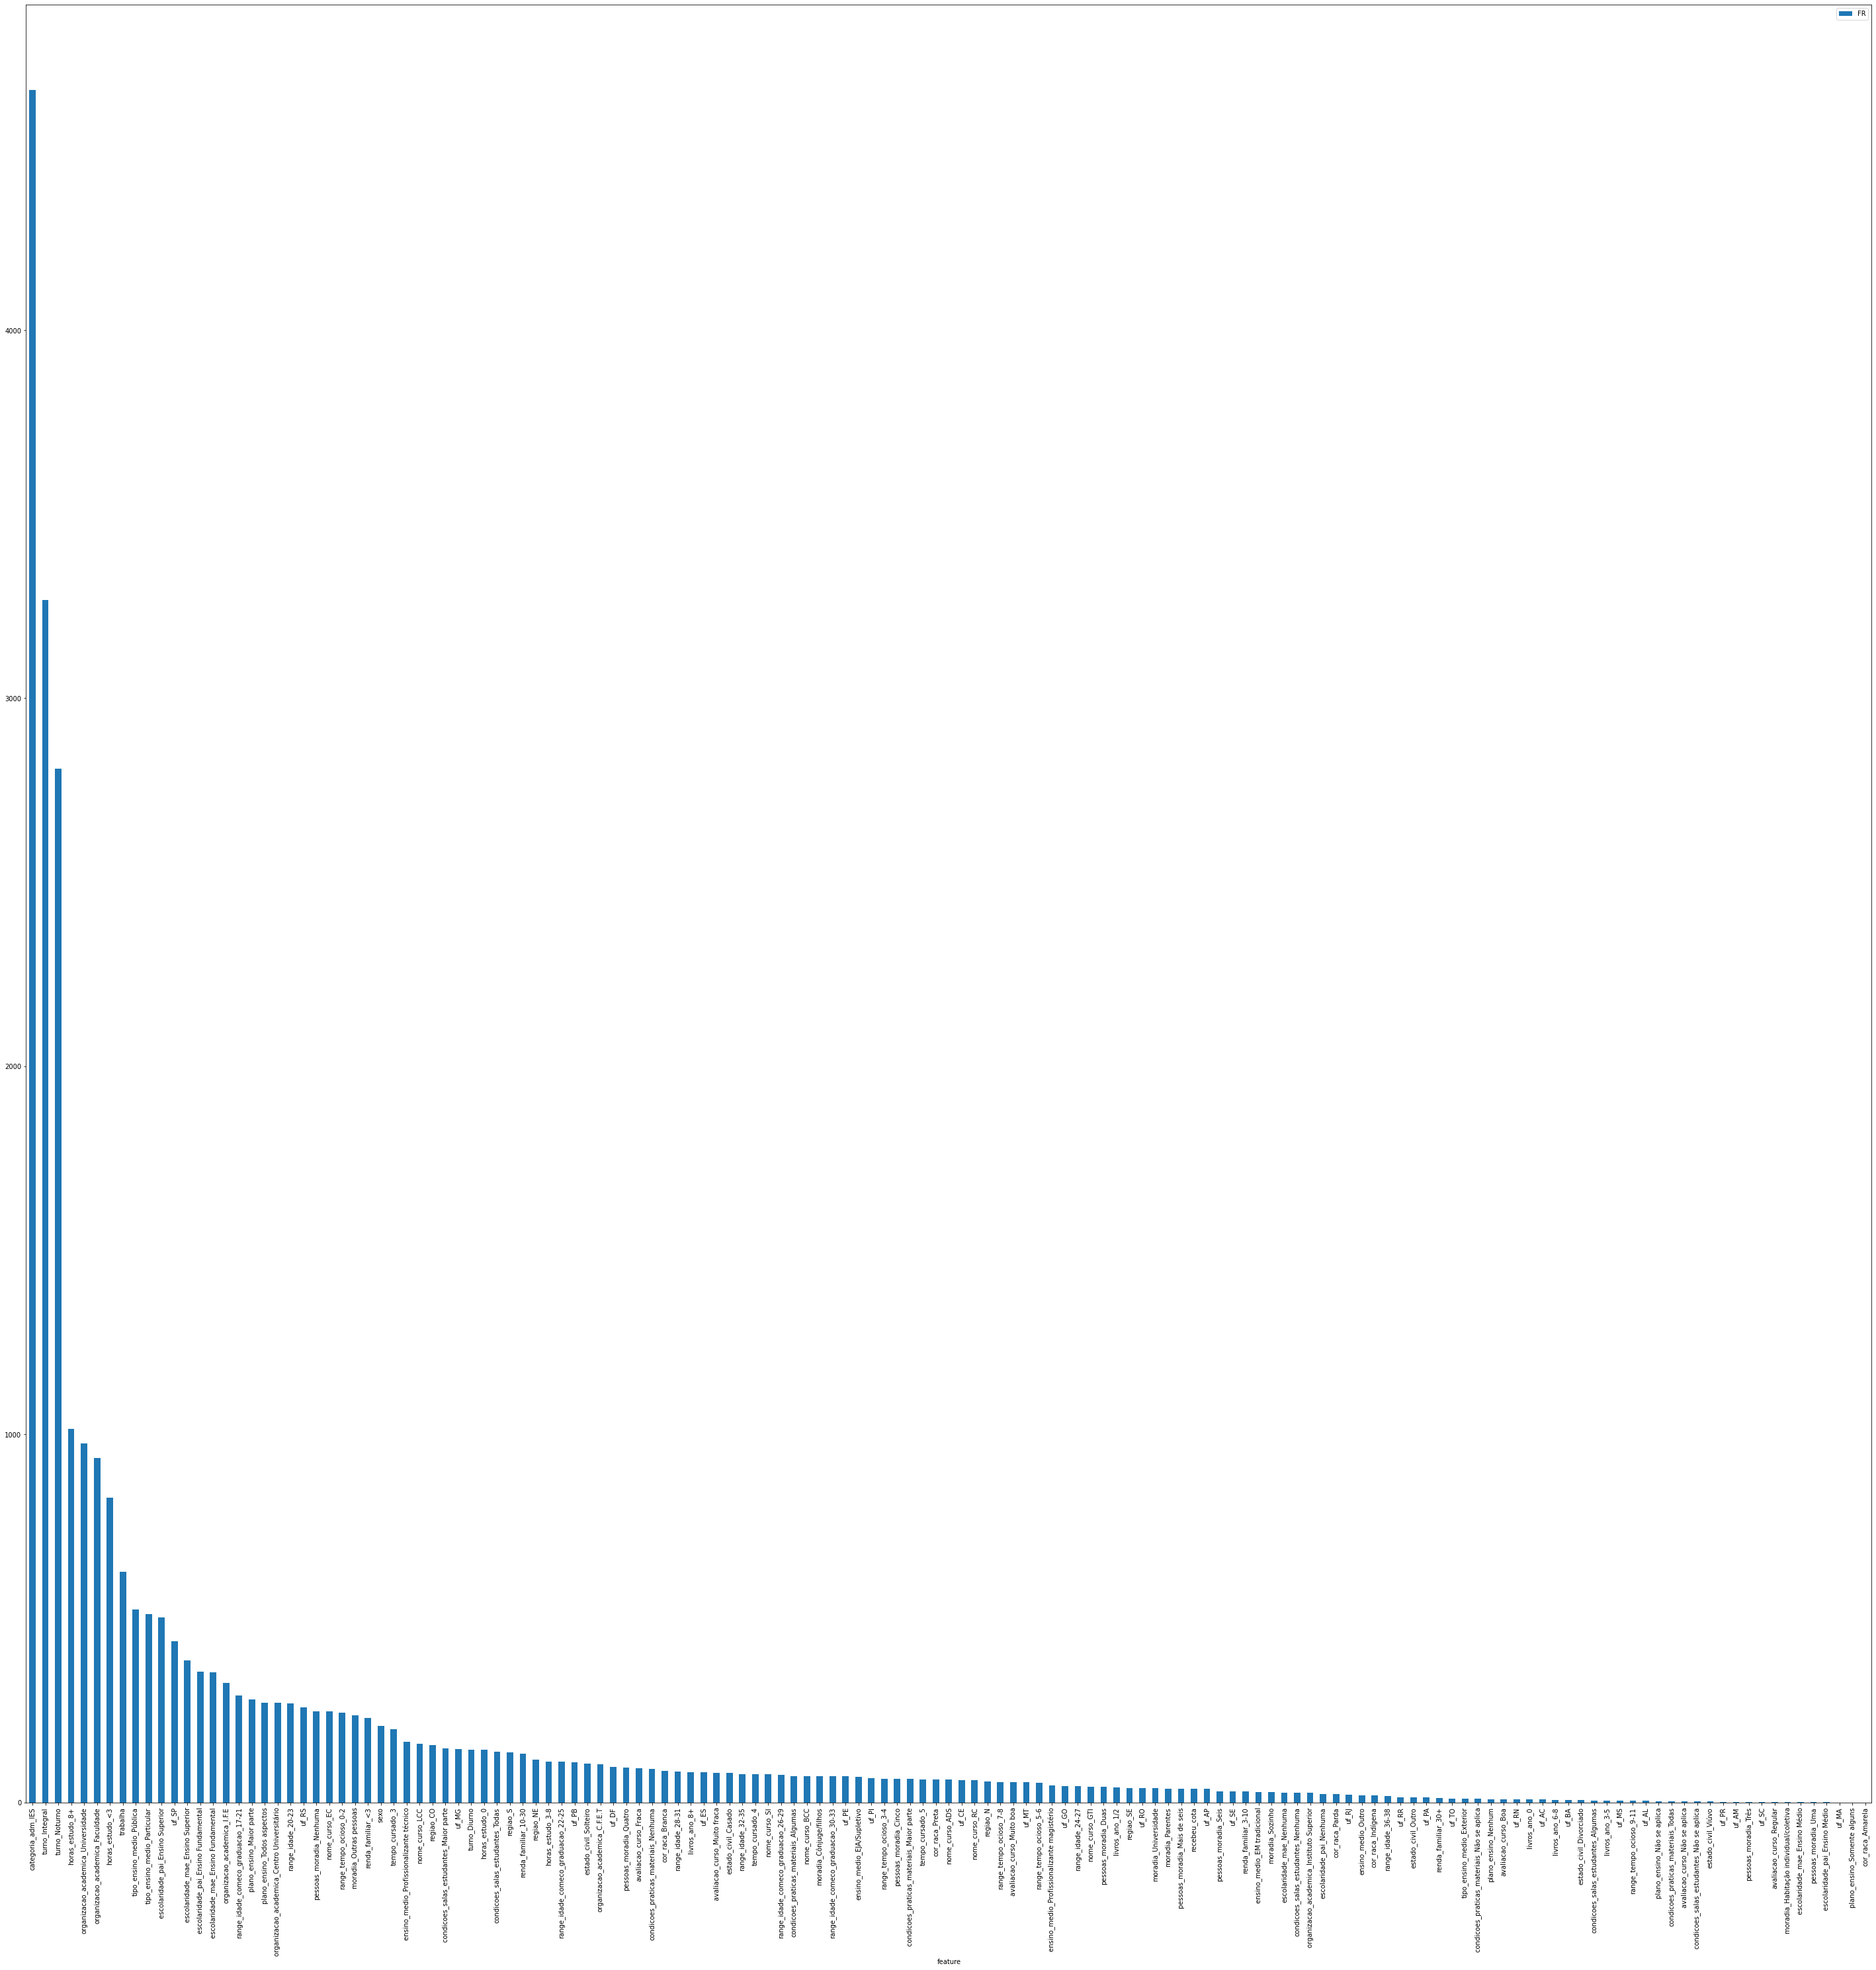

In [14]:
frdf.plot.bar(x='feature', y = 'FR', figsize=(50,50))

In [15]:
frdf.head(112)

,feature,FR
0,categoria_adm_IES,4652.365976
1,turno_Integral,3265.976786
2,turno_Noturno,2809.269816
3,horas_estudo_8+,1014.593816
4,organizacao_academica_Universidade,975.232518
...,...,...
107,estado_civil_Outro,13.291110
108,uf_PA,13.226866
109,renda_familiar_30+,11.856366
110,uf_TO,11.077428


In [16]:
melhores = []
melhores.append([29, SelectKBest(k=29, score_func=f_regression).fit_transform(X, y)])
melhores.append([39, SelectKBest(k=39, score_func=f_regression).fit_transform(X, y)])
melhores.append([49, SelectKBest(k=49, score_func=f_regression).fit_transform(X, y)])
melhores.append([79, SelectKBest(k=79, score_func=f_regression).fit_transform(X, y)])
melhores.append([112, SelectKBest(k=112, score_func=f_regression).fit_transform(X, y)])

In [17]:
def plotError(y_test, y_pred, modelo):
  matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
  preds = pd.DataFrame({'true':y_test, 'preds':y_pred})
  preds["residuals"] = preds["true"] - preds["preds"]
  # residual positivo (superestima),  negativo (subestima)
  # bom seria estar linear horizontal proximo de zero
  plot = preds.plot(x = "preds", y = "residuals",kind = "scatter")
  plot.set_title("Residual plot in {}".format(modelo))
  plot.get_figure().savefig('./{}.png'.format(modelo),dpi=600, bbox_inches='tight')


  print("Mean Absolute Error:     %.4f" % metrics.mean_absolute_error(y_test, y_pred))
  print("Mean Squared Error:      %.4f" % metrics.mean_squared_error(y_test, y_pred))
  print("Root Mean Squared Error: %.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print("R²", metrics.r2_score(y_test, y_pred))

In [19]:
def plotCVError(y_pred, modelo):
  matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
  # preds = pd.DataFrame({'true':y_test, 'preds':y_pred})

  residual = y - y_pred

  fig, ax = plt.subplots()
  plot = ax.scatter(y_pred, residual)
  # plt.title("Residual plot in {}".format(modelo))
  
  # plot = preds.plot(x = y_pred, y = residual,kind = "scatter")
  plot.set_title("Residual plot in {}".format(modelo))
  plot.get_figure().savefig('./{}.png'.format(modelo),dpi=600, bbox_inches='tight')

  print("Mean Absolute Error:     %.4f" % metrics.mean_absolute_error(y, y_pred))
  print("Mean Squared Error:      %.4f" % metrics.mean_squared_error(y, y_pred))
  print("Root Mean Squared Error: %.4f" % np.sqrt(metrics.mean_squared_error(y, y_pred)))
  print("R²", metrics.r2_score(y, y_pred))

Mean Absolute Error:     0.1624
Mean Squared Error:      0.0398
Root Mean Squared Error: 0.1994
R² 0.15488586333841226


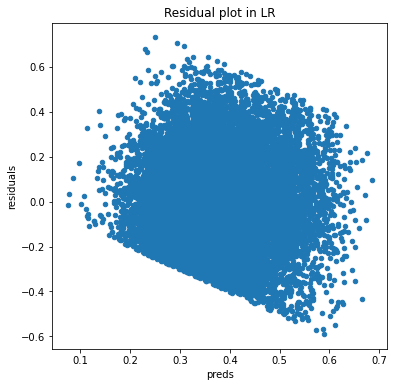

In [13]:
from sklearn import linear_model
regressor = linear_model.LinearRegression(fit_intercept=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
plotError(y_test, y_pred, 'LR')

29 melhores
Mean Absolute Error:     0.1782
Mean Squared Error:      0.0488
Root Mean Squared Error: 0.2209
R² -0.03049656097134834
39 melhores
Mean Absolute Error:     0.1726
Mean Squared Error:      0.0454
Root Mean Squared Error: 0.2131
R² 0.031743756926488564
49 melhores
Mean Absolute Error:     0.1711
Mean Squared Error:      0.0447
Root Mean Squared Error: 0.2114
R² 0.05845491585847695
79 melhores
Mean Absolute Error:     0.1632
Mean Squared Error:      0.0405
Root Mean Squared Error: 0.2012
R² 0.1368185835445026
112 melhores
Mean Absolute Error:     0.1617
Mean Squared Error:      0.0398
Root Mean Squared Error: 0.1996
R² 0.15323285350262184


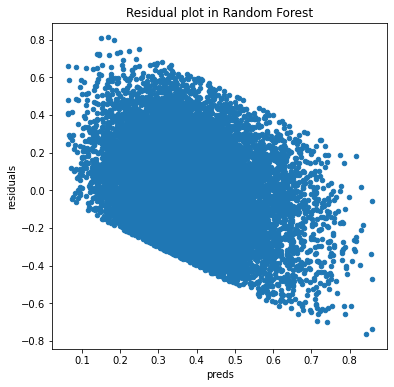

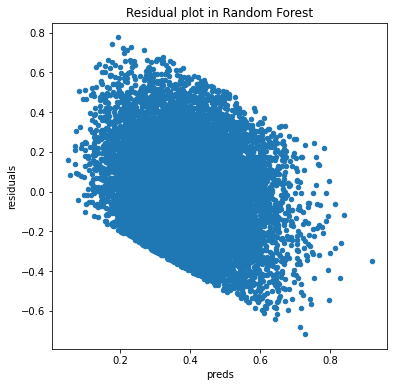

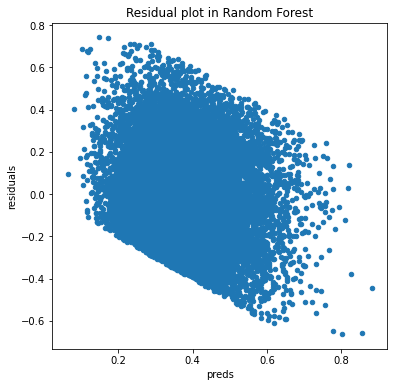

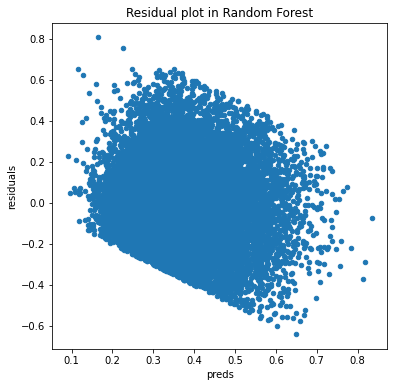

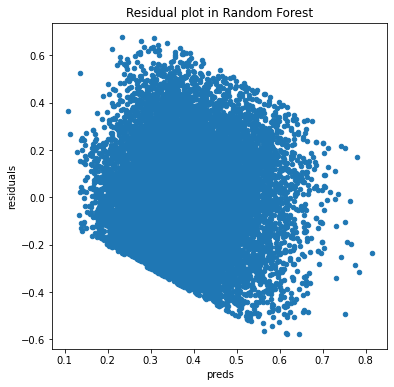

In [41]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs=-1)

for i in melhores:
    print(i[0], 'melhores')
    X_train, X_test, y_train, y_test = train_test_split(i[1], y, test_size = 0.25)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    plotError(y_test, y_pred, 'Random Forest')

29 melhores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   43.6s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.4min remaining:   55.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.4min remaining:   35.9s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.4min remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


Mean Absolute Error:     0.1781
Mean Squared Error:      0.0486
Root Mean Squared Error: 0.2206
R² -0.037377878924492514
39 melhores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  3.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  3.2min remaining:   47.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished


Mean Absolute Error:     0.1725
Mean Squared Error:      0.0455
Root Mean Squared Error: 0.2132
R² 0.030500062622480728
49 melhores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.3min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  3.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.3min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  3.3min remaining:   49.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


Mean Absolute Error:     0.1705
Mean Squared Error:      0.0443
Root Mean Squared Error: 0.2104
R² 0.05578598229300624
79 melhores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  2.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  5.2min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.2min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  5.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min finished


Mean Absolute Error:     0.1629
Mean Squared Error:      0.0403
Root Mean Squared Error: 0.2008
R² 0.1404964749195945
112 melhores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  3.8min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  7.3min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  7.5min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  7.5min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  7.5min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.3min finished


Mean Absolute Error:     0.1615
Mean Squared Error:      0.0396
Root Mean Squared Error: 0.1990
R² 0.15549619275065285


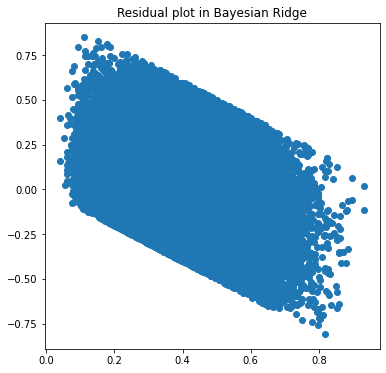

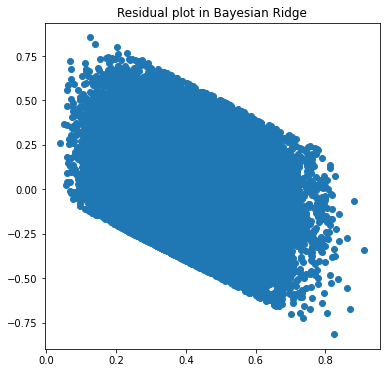

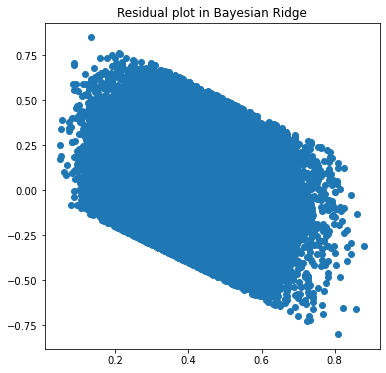

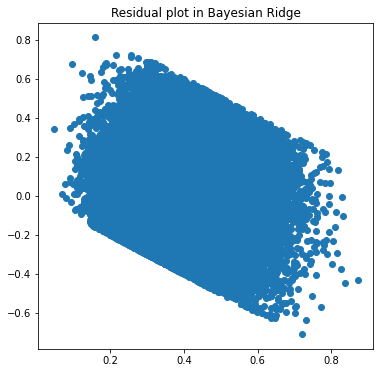

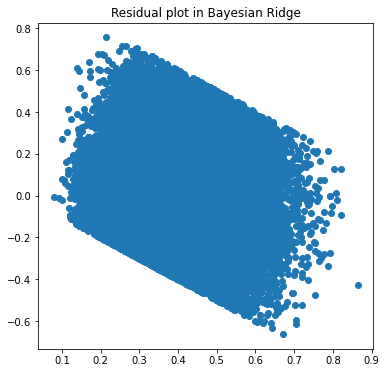

In [19]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs=-1)
cv = KFold(n_splits=4, random_state=1, shuffle=True)

for i in melhores:
    print(i[0], 'melhores')
    X_train, X_test, y_train, y_test = train_test_split(i[1], y, test_size = 0.25)
    regressor.fit(X_train, y_train)
    y_pred = cross_val_predict(regressor, i[1], y, cv=cv, n_jobs=-1, verbose=15)

    plotCVError(y_pred, 'Bayesian Ridge')

### SVM

Mean Absolute Error:     0.1627
Mean Squared Error:      0.0408
Root Mean Squared Error: 0.2019
R² 0.12490827905353519


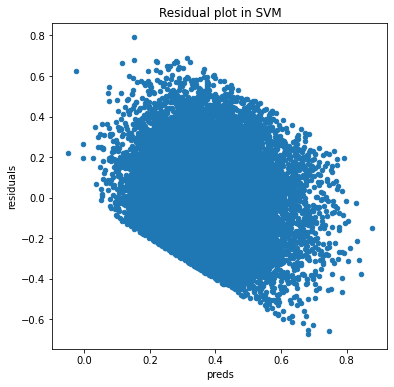

In [20]:
from sklearn.svm import SVR
svm = SVR()
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

plotError(y_test, y_pred, 'SVM')
# y_pred = cross_val_predict(svm, X, y, cv=cv, n_jobs=-1, verbose=15)

# plotCVError(y_pred, 'SVM')

### Arvore

In [22]:
def plotCVError(y_pred, modelo):
  matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
  # preds = pd.DataFrame({'true':y_test, 'preds':y_pred})

  residual = y - y_pred

  fig, ax = plt.subplots()
  ax.scatter(y_pred, residual)
  # plt.title("Residual plot in {}".format(modelo))
  
  # plot = preds.plot(x = y_pred, y = residual,kind = "scatter")
  ax.set_title("Residual plot in {}".format(modelo))
  fig.get_figure().savefig('./{}.png'.format(modelo),dpi=600, bbox_inches='tight')

  print("Mean Absolute Error:     %.4f" % metrics.mean_absolute_error(y, y_pred))
  print("Mean Squared Error:      %.4f" % metrics.mean_squared_error(y, y_pred))
  print("Root Mean Squared Error: %.4f" % np.sqrt(metrics.mean_squared_error(y, y_pred)))
  print("R²", metrics.r2_score(y, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   17.2s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.7s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   21.5s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   21.6s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   23.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.7s finished


Mean Absolute Error:     0.1645
Mean Squared Error:      0.0409
Root Mean Squared Error: 0.2022
R² 0.12814699858420298


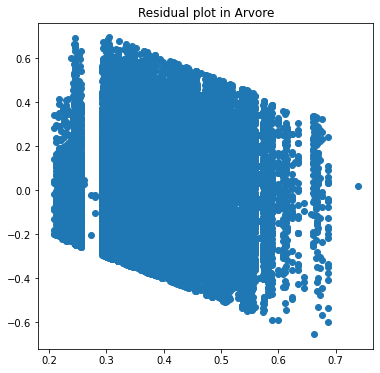

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(ccp_alpha=0.0, max_depth=10, max_leaf_nodes=50)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train, y_train)
y_pred = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1, verbose=15)
plotCVError(y_pred, 'Arvore')

### Bayes

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   18.9s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   20.1s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   21.6s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   23.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.9s finished


Mean Absolute Error:     0.1613
Mean Squared Error:      0.0394
Root Mean Squared Error: 0.1984
R² 0.16037059295399148


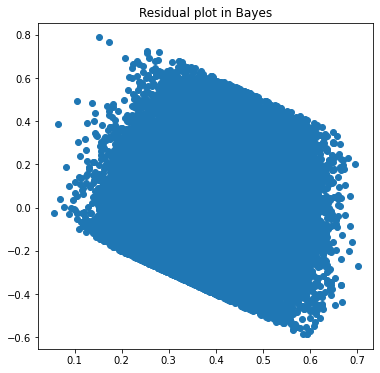

In [24]:
from sklearn.linear_model import BayesianRidge
regressor = BayesianRidge(alpha_1=1e-8, alpha_2=1e-5, fit_intercept=False,lambda_1=1e-7, lambda_2=0.1, normalize=True,tol=0.1)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train, y_train)
y_pred = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1, verbose=15)
plotCVError(y_pred, 'Bayes')

### Regressao Linear

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    7.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished


Mean Absolute Error:     0.1613
Mean Squared Error:      0.0394
Root Mean Squared Error: 0.1985
R² 0.15998009442907235


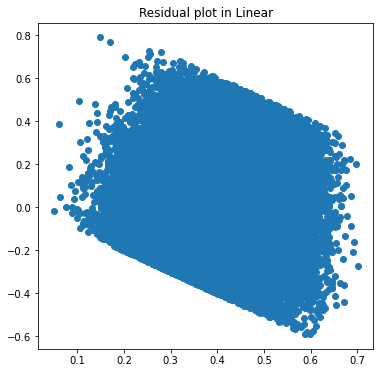

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1, fit_intercept=True, normalize=False, positive=False)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train, y_train)
y_pred = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1, verbose=15)
plotCVError(y_pred, 'Linear')

### Random forest

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  5.7min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.7min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  5.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.4min finished


Mean Absolute Error:     0.1624
Mean Squared Error:      0.0398
Root Mean Squared Error: 0.1994
R² 0.15207948532881654


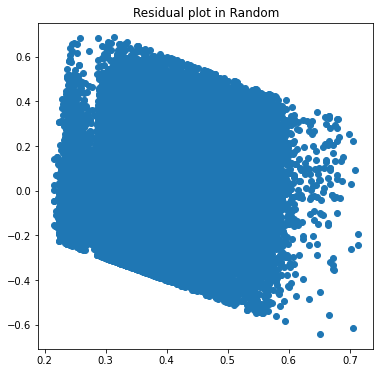

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_jobs=-1, bootstrap=True, max_depth=50, max_leaf_nodes=100, n_estimators=100)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train, y_train)
y_pred = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1, verbose=15)
plotCVError(y_pred, 'Random')

### Ridge

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


Mean Absolute Error:     0.1613
Mean Squared Error:      0.0394
Root Mean Squared Error: 0.1984
R² 0.16032422034636584


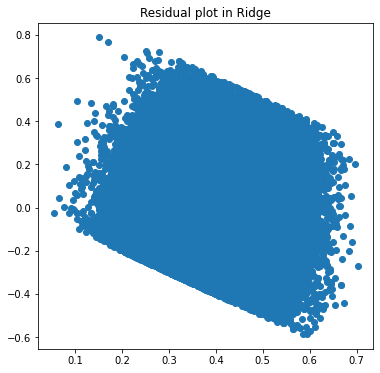

In [27]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=1.0, fit_intercept=False, normalize=False, tol=0.001)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regressor.fit(X_train, y_train)
y_pred = cross_val_predict(regressor, X, y, cv=cv, n_jobs=-1, verbose=15)
plotCVError(y_pred, 'Ridge')